# Лабораторная работа 1. Композиции алгоритмов. Ранжирование.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_02.ipynb.

## Bias-Variance decomposition. Композиции алгоритмов

![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Рассмотрим задачу регрессии со среднеквадратичной функцией потерь, а также некоторый алгоритм $a$. Тогда качество алгоритма $a$ может быть записано следующим образом:

$$Q(a) = \mathbb{E}_{X^l} \mathbb{E}_{x,y}(a(x) - y)^2,$$

где первое матожидание вычисляется по всевозможным обучающим выборкам $X^l$ размера $l$. К сожалению, на реальных данных эта формула неприменима из-за невозможности сгенерировать необходимые для оценки данные. Поэтому проведем приближенный численный эксперимент с эмпирическими оценками матожиданий.

С помощью бутстраппинга можно просемплировать из обучающей выборки $N$ новых выборок того же размера, тем самым "имитируя" пространство всевозможных обучающих выборок, после чего обучить на каждой выбранный алгоритм. Обозначим вектор истинных меток тестовой выборки за $y \in \mathbb{R}^{m}$. Векторы прогнозов для объектов из тестовой выборки для каждой модели обозначим за $\hat{y}_i \in \mathbb{R}^{m}, i \in \{1, .., N\}$. Тогда средний квадрат ошибки по всем моделям на тестовой выборке запишется как

$$error=\frac{1}{N}\sum_{i=1}^{N}MSE(y,\hat{y}_i).$$

Обозначим среднее предсказание за $$\overline{y} = \frac{1}{N}\sum_{i=1}^{N} \hat{y}_i.$$

Тогда квадрат отклонения среднего предсказания и разброс прогнозов относительно среднего предсказания всех моделей на тестовой выборке от истинных меток запишутся следующим образом, соответственно:

$$bias^2 = MSE(y, \overline y),$$

$$variance = \frac{1}{N}\sum_{i=1}^N MSE(\hat{y}_i, \overline y).$$


Для начала рассмотрим в качестве алгоритма решающее дерево. Как известно, при увеличении высоты дерева алгоритм может быть сильно чувствителен к составу обучающей выборки. Чтобы подтвердить эти предположения, проведите следующие эксперименты.

Загрузите [набор данных](http://archive.ics.uci.edu/ml/datasets/BlogFeedback). Каждый объект — пост в блоге. Он описывается различными признаками: длина текста поста, наличие наиболее частотных слов, день недели, количество комментариев за последние 24 часа и т.п., а так же целевым признаком — количеством комментариев к посту. Полный список признаков и описание находятся на странице датасета. 

Разбейте данные из файла **blogData_train.csv** на обучающую и тестовую выборки в пропорциях 1 к 4 соответственно. Обратите внимание, что обучающая выборка меньше тестовой. Такая большая тестовая выборка позволит сделать измерение качества моделей достаточно достоверным. 

In [44]:
from sklearn.cross_validation import train_test_split
from sklearn.utils import resample
from pandas import read_csv

In [45]:
data = read_csv('BlogFeedback/blogData_train.csv', header=None)
train, test = train_test_split(data, train_size = 0.2)

**(1 балл) Задание 1.** Постройте графики зависимости $error$, $bias^2$ и $variance$ от глубины решающего дерева (от 1 до 15 включительно) для $N=100$. 

In [46]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [78]:
tree_depth = np.arange(15) + 1
train_cols = train_n.columns.difference([280])
bias_square = []
error = []
variance = []
N = 100
for depth in tree_depth:
    y_s = []
    for i in range(N):
        train_n = resample(train, n_samples = train.shape[0])
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(train_n[train_cols], train_n[280])
        y = regressor.predict(test[train_cols])
        y_s.append(y)
    y_mean = np.zeros(test.shape[0])    
    err = 0.
    for y in y_s:
        err += mean_squared_error(y, test[280])
        y_mean += y
    error.append(err / N)
    y_mean /= N
    sum_of_mse = 0.
    bias_square.append(mean_squared_error(test[280], y_mean))
    for y in y_s:
        sum_of_mse += mean_squared_error(y_mean, y)
    variance.append(sum_of_mse / N)

In [72]:
import matplotlib
import matplotlib.pylab as plt

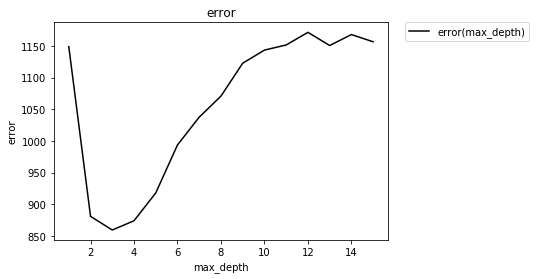

In [79]:
plt.plot(tree_depth, error, color = 'black', label = 'error(max_depth)')
plt.title('error')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

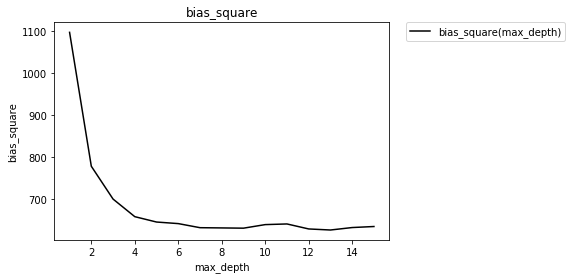

In [80]:
plt.plot(tree_depth, bias_square, color = 'black', label = 'bias_square(max_depth)')
plt.title('bias_square')
plt.xlabel('max_depth')
plt.ylabel('bias_square')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

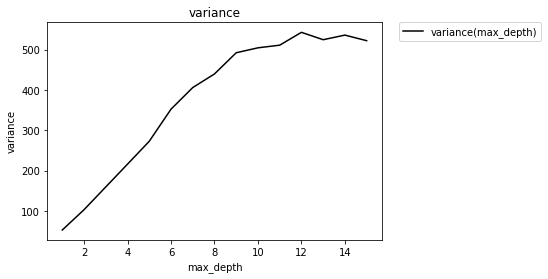

In [81]:
plt.plot(tree_depth, variance, color = 'black', label = 'variance(max_depth)')
plt.title('variance')
plt.xlabel('max_depth')
plt.ylabel('variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**(0.5 балла) Задание 2.** Являются ли какие-то из полученных графиков монотонными? А должны ли они быть монотонными, если бы гипотетически эксперименты были проведены на всевозможных выборках? Почему? Убедитесь численно, что верно bias-variance разложение ошибки: $$error = bias^2 + variance$$

**Графики компонент ошибки получились монотонными, в силу того, что значение variance не оказалось значительно мешьше значения bias$^2$, график error не монотонный. Если проводить эксперименты на всевозможных выборках, при увеличении высоты решающего дерева модель не перестанет усложняться и переобучаться, а, следовательно, расти значение variance и соответственно убывать значение bias$^2$**.

In [83]:
print('Error:')
print(np.array(error))
print('Bias + variance:')
print(np.array(bias_square) + np.array(variance))

Error:
[ 1148.92477013   880.71857299   859.1561733    873.80209847   917.7520642
   993.65071256  1037.57051528  1070.81995025  1122.82461055  1143.52860527
  1151.6428381   1171.60645945  1150.79407726  1168.0913625   1156.67476999]
Bias + variance:
[ 1148.92477013   880.71857299   859.1561733    873.80209847   917.7520642
   993.65071256  1037.57051528  1070.81995025  1122.82461055  1143.52860527
  1151.6428381   1171.60645945  1150.79407726  1168.0913625   1156.67476999]


## Композиции алгоритмов

Несмотря на описанный выше недостаток решающих деревьев, объединение их в композиции позволяет существенно улучшить качество предсказания. Рассмотрим несколько способов построения композиций.

### Bagging + RSM

![](https://sites.google.com/site/rajhansgondane2506/_/rsrc/1467898300734/publications/rrftrain.jpg?height=215&width=320)

Один из способов объединения алгоритмов в композиции — обучение каждого отдельного алгоритма на некоторой подвыборке из исходной выборки ([bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)) и подмножестве исходных признаков ([RSM](https://en.wikipedia.org/wiki/Random_subspace_method)). В sklearn этот тип композиции реализован в классе [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) (для случая регресии). Подобный подход также есть в реализации [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

### Градиентный бустинг

В случае бустинга композиция алгоритмов строится последовательно. Каждый следующий базовый алгоритм акцентируется на тех объектах, на которых обученная ранее композиция допускала ошибку.

На данный момент одной из самых широко распространенных реализаций бустинга является библиотека [XGBoost](https://github.com/dmlc/xgboost). В ней большое внимание уделяется регуляризации и скорости, нежели в других реализациях бустинга (например,  [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) из sklearn). Кроме того, XGBoost позволяет оптимизировать различные функции потерь, а также более гибок, засчет большого числа параметров.

XGBoost строит композицию из $K$ базовых алгоритмов $b_k$:

$$ \hat{y}_i = \hat{y}_i^{K} = \sum_{k=1}^{K} b_k(x_i) = \hat{y}_i^{\left(K - 1\right)} + b_K(x_i), $$

минимизируя следующий функционал:

$$ Obj = \sum_{i=1}^N \mathcal{L}(y_i, \hat{y}_i ) + \sum_{k=1}^{K} \Omega(b_k),$$

где
 - $N$ — размер обучающей выборки;
 - $x_i, y_i, \hat{y}_i$ — i-ый объект, правильный ответ и предсказание модели для него;
 - $\hat{y}_i^{t}$ — предсказание композиции из $t$ уже обученных базовых алгоритмов для i-го объекта;
 - $\Omega$ — регуляризатор;
 - $\mathcal{L}(y_i, \hat{y}_i)$ — функция потерь.

Функционал, оптимизируемый на $t$-ой итерации:

$$ Obj^{(t)} = \sum_{i=1}^N \mathcal{L}\left(y_i, \hat{y}_i^{(t-1)} + b_t(x_i)\right) + \Omega(b_t).$$

В XGBoost реализовано несколько различных функций потерь, что позволяет решать задачи классификации (бинарной и мультиклассовой), регрессии и ранжирования. Вот некоторые из них:

- reg:linear — линейная регрессия
- reg:logistic — логистическая регрессия
- binary:logistic — логистическая регрессия
- multi:softmax — softmax функция потерь для многоклассовой классификации
- rank:pairwise — минимизация pairwise-функции потерь для задачи ранжирования

**(1 балл) Задание 3.** Проведите аналогичный эксперимент с bias-variance разложением для градиентного бустинга для количество алгоритмов 1, 5, 10, 25 и 50, используя в качестве базовых алгоритмов решающие деревья. Обратите внимание, что данная библиотека имеет два интерфейса (стандартный и аналог sklearn), названия параметров в которых могут отличаться.

In [84]:
import xgboost

In [86]:
estimators = np.array([1, 5, 10, 25, 50])
bias_square = []
error = []
variance = []
train_cols = train_n.columns.difference([280])
N = 100
for n_est in estimators:
    y_s = []
    for i in range(N):
        train_n = resample(train, n_samples = train.shape[0])
        regressor = xgboost.XGBRegressor(n_estimators = n_est)
        regressor.fit(train_n[train_cols], train_n[280])
        y = regressor.predict(test[train_cols])
        y_s.append(y)
    y_mean = np.zeros(test.shape[0])    
    err = 0.
    for y in y_s:
        err += mean_squared_error(y, test[280])
        y_mean += y
    error.append(err / N)
    y_mean /= N
    sum_of_mse = 0.
    bias_square.append(mean_squared_error(test[280], y_mean))
    for y in y_s:
        sum_of_mse += mean_squared_error(y_mean, y)
    variance.append(sum_of_mse / N)

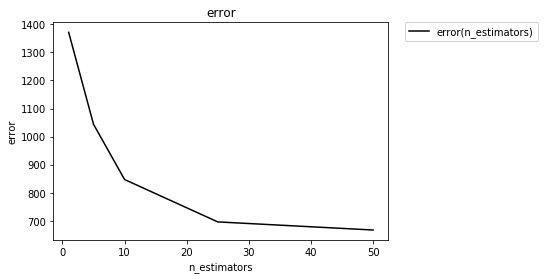

In [87]:
plt.plot(estimators, error, color = 'black', label = 'error(n_estimators)')
plt.title('error')
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

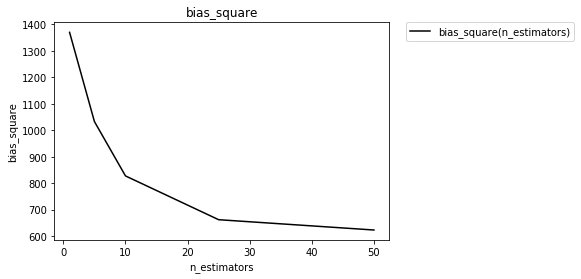

In [89]:
plt.plot(estimators, bias_square, color = 'black', label = 'bias_square(n_estimators)')
plt.title('bias_square')
plt.xlabel('n_estimators')
plt.ylabel('bias_square')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

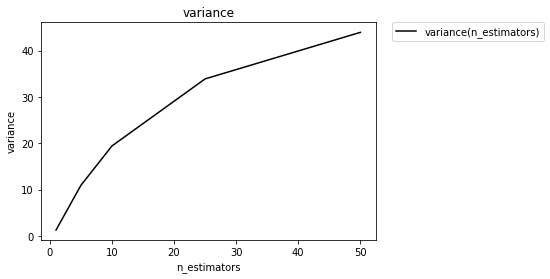

In [90]:
plt.plot(estimators, variance, color = 'black', label = 'variance(n_estimators)')
plt.title('variance')
plt.xlabel('n_estimators')
plt.ylabel('variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [91]:
print('Error:')
print(np.array(error))
print('Bias + variance:')
print(np.array(bias_square) + np.array(variance))

Error:
[ 1371.34349868  1043.96468926   847.15473089   696.21834568   667.34635227]
Bias + variance:
[ 1371.34349868  1043.96468926   847.15473089   696.21834568   667.34635227]


**(0.5 балла) Задание 4.** Отличаются ли графики в рассмотренных моделях (решающее дерево, градиентный бустинг на решающих деревьях)  между собой? На какую компоненту из разложения ошибки влияет объединение алгоритмов в рассмотренный тип композиции? Поясните свой ответ.

**Графики отличаются значениями variane, которые градиентный бустинг стремится минимизировать, само поведение компонент error такое же, но в следствие очень малого variance для xgboost.XGBRegressor(), графики error не похожи. Градиентный бустинг старается минизировать обе компоненты ошибки, но для bias$^2$ это не так очевидно, если смотреть относительно графиков для решающего дерека, т.к. оно тоже стремится уменьшить bias$^2$.**

### Стекинг
![](https://4.bp.blogspot.com/-hCxAb57kzDQ/VuMgHy3hAhI/AAAAAAAAAVk/djmL9IHv5QkLWeudjE50qDoCTbiUrTetA/s1600/Stacking.jpg)

[Stacking](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking) — еще один способ объединить несколько алгоритмов в один, который часто используется как в решении реальных задач из промышленной сферы, так и в конкурсах на платформах вроде Kaggle. Подход использует понятие *базовых классификаторов*, каждый из которых независимо обучается на некотором (возможно одном и том же) множестве признаков, а также *мета-классификатора*, использующего предсказания базовых классификаторов как факторы. 

Загрузите [датасет](https://archive.ics.uci.edu/ml/datasets/covertype). В тренировочных целях предлагается вместо задачи мультиклассификации решать задачу обычной бинарной классификации — научиться отличать **Spruce-Fir** (значение целевой переменной — 1) от **Lodgepole Pine** (значение целевой переменной — 2). Разделите выборку на обучение и тест в соотношении 50/50. В качестве метрики используйте [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('covtype.data', header = None)
sample = data[data[54] < 3]
train, test = train_test_split(sample, train_size = 0.5)

**(1 балл) Задание 5.** Использование мета-классификатора подразумевает получение предсказаний от базовых классификаторов для тех объектов обучающей выборки, на которых мета-классификатор будет обучаться. В свою очередь базовые классификаторы тоже должны быть обучены на некоторой выборке. Чтобы избежать переобучения, обучающее множество делится на $n$ фолдов, $(n-1)$ из которых используются для обучения базовых классификаторов, а $n$-ый — для предсказания (вычисления мета-фактора).

Для получения мета-факторов для тестовых данных базовые классификаторы могут быть обучены на всем обучающем множестве, поскольку проблема переобучения здесь не возникает. Другими словами, если мы хотим посчитать факторы для тестового множества, мы можем спокойно использовать обучающее множество для тренировки базовых классификаторов. Если же мы хотим посчитать факторы для обучающего множества, то необходимо следить, чтобы классификатор не предсказывал для тех объектов, на которых обучался.

Мета-классификатор может быть обучен как на множестве исходных факторов, дополненным мета-факторами, так и исключительно на множестве мета-факторов. Выбор зависит от решаемой задачи.

Напишите функцию, которая получает на вход классификатор, обучающую и тестовые выборки, а также параметры [кросс-валидатора](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) и возвращающую значения мета-фактора для обучающего и тестового множеств

In [3]:
import numpy as np

In [4]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv, *args, **kwargs):
    train_meta = np.zeros(y_train.shape[0])
    cv_object = cv(*args, **kwargs)
    for train_index, test_index in cv_object.split(X_train, y_train):
        train = X_train.iloc[train_index]
        test = X_train.iloc[test_index]
        y = y_train.iloc[train_index]
        clf.fit(train, y)
        train_meta[test_index] = clf.predict_proba(test)[:,0]
    clf.fit(X_train, y_train)
    test_meta = clf.predict_proba(X_test)[:,0]
    return train_meta, test_meta

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

feature_cols = train.columns.difference([54])

Поэкспериментируйте со стекингом, ответьте на вопросы и обоснуйте наблюдения:
  - **(1 балл) Задание 6.** Обучите различные известные вам модели машинного обучения и сделайте из них стекинг-композицию. 
  
  Базовые алгоритмы могут отличаться друг от друга:
    - моделью машинного обучения,
    - гиперпараметрами (например, различные функции потерь или глубины деревьев),
    - набором факторов,
    - типом модели: для данной задачи можно использовать как классификаторы, так и регрессоры.
  
  Обратите внимание, что бинарные мета-факторы дают меньше полезного сигнала мета-классификатору, чем числовые, поэтому базовым классификаторам лучше возвращать вероятность/числовую функцию, чем метки классов.
  - **(1 балл) Задание 7.** Обучите мета-классификатор на различных наборах факторов:
    - исходные факторы,
    - исходные факторы + мета-факторы,
    - мета-факторы.
    
    Имеет ли смысл добавлять исходные факторы в мета-классификатор, если базовые классификаторы уже обучены на этом наборе? Удается ли добиться улучшения качества за счет стекинга? Какие классификаторы лучше сочетаются друг с другом в такой композиции?
  - **(0.5 балла) Задание 8.** Попробуйте разные размеры фолда при подсчете мета-факторов. Влияет ли размер на качество?
  - **(0.5 балла) Задание 9.** Зафиксируйте некоторый набор базовых классификаторов. Обучите поверх них линейную модель и сравните ее с мета-классификатором, который считает среднее по всем метафакторам. Дает ли преимущество линейная модель? О чем говорят коэффициенты линейной модели в данном случае?


**Композиция базовых классификаторов:**

In [6]:
def compute_meta(clfs, X_train, X_test, y_train, cv, *args, **kwargs):
    train_meta = np.zeros([X_train.shape[0], len(clfs)])
    test_meta = np.zeros([X_test.shape[0], len(clfs),])
    for i in range(len(clfs)):
        train_col, test_col = compute_meta_feature(clfs[i], X_train, X_test, y_train, cv, *args, **kwargs)
        train_meta[:,i] = train_col.copy()
        test_meta[:,i] = test_col.copy()
    return train_meta, test_meta

**Построение классификации базовых алгоритмов и подсчёт метаданных (2 фолда в кросс-валидации):**

In [7]:
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**Первая композиция:**

In [8]:
clfs = []
clfs.append(KNeighborsClassifier(n_jobs = -1))
clfs.append(DecisionTreeClassifier(max_depth = 2))
clfs.append(DecisionTreeClassifier(max_depth = 1))
clfs.append(GaussianNB())

**Функция, которая принимает классификатор, выборки + метаданные, учит классификатор тремя описанными выше способами и возвращает кортеж из трёх score, первый - для обучения только на обучающей выборке, второй - на обучающей выборке и метаданных, третий - на одних метаданных.**

In [9]:
from sklearn.metrics import accuracy_score


def count_each_aссuracy(meta_clf, x_train, y_train, x_test, y_test, train_meta, test_meta):
    result = []
    
    #only dataset
    meta_clf.fit(x_train, y_train)
    y_predict = meta_clf.predict(x_test)
    result.append(accuracy_score(y_predict, y_test))

    #dataset and metadata
    train_with_meta = np.hstack((x_train, train_meta))
    test_with_meta = np.hstack((x_test, test_meta))
    meta_clf.fit(train_with_meta, y_train)
    y_predict = meta_clf.predict(test_with_meta)
    result.append(accuracy_score(y_predict, y_test))
    
    #only metadata
    meta_clf.fit(train_meta, y_train)
    y_predict = meta_clf.predict(test_meta)
    result.append(accuracy_score(y_predict, y_test))
    
    return tuple(result)

**Учим метаклассификатор и считаем score предыдущим методом, в качестве классификатора берём xgboost.XGBClassifier() и метод стохастического градиента.**

In [13]:
import xgboost
meta_clf_xgb = xgboost.XGBClassifier(n_estimators = 10)
meta_clf_sgd = SGDClassifier(n_jobs = -1)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [14]:
accur_xgb = []
accur_sgd = []
for n_spl in range(2,6):
    train_meta, test_meta = compute_meta(clfs, train[feature_cols], test[feature_cols], \
                                         train[54], KFold, n_splits=n_spl)
    accur_sgd.append(count_each_aссuracy(meta_clf_sgd, train[feature_cols], train[54], \
                                     test[feature_cols], test[54], train_meta, test_meta))
    accur_xgb.append(count_each_aссuracy(meta_clf_xgb, train[feature_cols], train[54], \
                                     test[feature_cols], test[54], train_meta, test_meta))

In [15]:
print('Accuracies for XGBClassifier for n_splits = 2,3,4,5')
for accur in accur_xgb:
    print(accur)
print('Accuracies for SGDClassifier for n_splits = 2,3,4,5')
for accur in accur_sgd:
    print(accur)

Accuracies for XGBClassifier for n_splits = 2,3,4,5
(0.76363144310117093, 0.96763756659705702, 0.96763756659705702)
(0.76363144310117093, 0.96763756659705702, 0.96763756659705702)
(0.76363144310117093, 0.96763756659705702, 0.96763756659705702)
(0.76363144310117093, 0.96763756659705702, 0.96763756659705702)
Accuracies for SGDClassifier for n_splits = 2,3,4,5
(0.61977776072318647, 0.67569303351361831, 0.96763756659705702)
(0.72389738701221062, 0.6847449822475169, 0.96763756659705702)
(0.68505600413618717, 0.52595820996804954, 0.96763756659705702)
(0.58420412730085514, 0.61192142860028031, 0.96763756659705702)


**Вторая композиция:**

In [16]:
clfs2 = []
clfs2.append(DecisionTreeClassifier(max_depth = 3))
clfs2.append(DecisionTreeClassifier(max_depth = 2))
clfs2.append(DecisionTreeClassifier(max_depth = 1))
clfs2.append(DecisionTreeClassifier(max_depth = 4))

In [17]:
accur_xgb = []
accur_sgd = []
for n_spl in range(2,6):
    train_meta, test_meta = compute_meta(clfs2, train[feature_cols], test[feature_cols], \
                                         train[54], KFold, n_splits=n_spl)
    accur_sgd.append(count_each_aссuracy(meta_clf_sgd, train[feature_cols], train[54], \
                                     test[feature_cols], test[54], train_meta, test_meta))
    accur_xgb.append(count_each_aссuracy(meta_clf_xgb, train[feature_cols], train[54], \
                                     test[feature_cols], test[54], train_meta, test_meta))

In [18]:
print('Accuracies for XGBClassifier for n_splits = 2,3,4,5')
for accur in accur_xgb:
    print(accur)
print('Accuracies for SGDClassifier for n_splits = 2,3,4,5')
for accur in accur_sgd:
    print(accur)

Accuracies for XGBClassifier for n_splits = 2,3,4,5
(0.76363144310117093, 0.765558163112804, 0.76161585969277501)
(0.76363144310117093, 0.76933081822992189, 0.76161585969277501)
(0.76363144310117093, 0.76329618574065616, 0.76161585969277501)
(0.76363144310117093, 0.76870069596196644, 0.76161585969277501)
Accuracies for SGDClassifier for n_splits = 2,3,4,5
(0.60133456664956719, 0.64755968994753021, 0.74288183995702239)
(0.61993125204486799, 0.71558462016956748, 0.74288183995702239)
(0.57627508876241562, 0.69147436492965653, 0.74288183995702239)
(0.739759503334397, 0.60225147533434853, 0.74288183995702239)


**Третья композиция:**

In [19]:
clfs3 = []
clfs3.append(KNeighborsClassifier(n_jobs = -1))
clfs3.append(KNeighborsClassifier(n_jobs = -1, n_neighbors = 10))
clfs3.append(DecisionTreeClassifier(max_depth = 1))
clfs3.append(GaussianNB())

In [20]:
accur_xgb = []
accur_sgd = []
for n_spl in range(2,6):
    train_meta, test_meta = compute_meta(clfs3, train[feature_cols], test[feature_cols], \
                                         train[54], KFold, n_splits=n_spl)
    accur_sgd.append(count_each_aссuracy(meta_clf_sgd, train[feature_cols], train[54], \
                                     test[feature_cols], test[54], train_meta, test_meta))
    accur_xgb.append(count_each_aссuracy(meta_clf_xgb, train[feature_cols], train[54], \
                                     test[feature_cols], test[54], train_meta, test_meta))

In [21]:
print('Accuracies for XGBClassifier for n_splits = 2,3,4,5')
for accur in accur_xgb:
    print(accur)
print('Accuracies for SGDClassifier for n_splits = 2,3,4,5')
for accur in accur_sgd:
    print(accur)

Accuracies for XGBClassifier for n_splits = 2,3,4,5
(0.76363144310117093, 0.96763756659705702, 0.96763756659705702)
(0.76363144310117093, 0.96763756659705702, 0.96763756659705702)
(0.76363144310117093, 0.96763756659705702, 0.96763756659705702)
(0.76363144310117093, 0.96763756659705702, 0.96763756659705702)
Accuracies for SGDClassifier for n_splits = 2,3,4,5
(0.63280836608488067, 0.6641852236328164, 0.96763756659705702)
(0.58326702238953676, 0.65274204167693306, 0.96763756659705702)
(0.70916625937609812, 0.74570123318159232, 0.96763756659705702)
(0.61210319463911367, 0.63509053968356555, 0.96763756659705702)


**Рассмотрим те же классификаторы и сравним линейную модель (стохастический градиент) с классификатором, возвращающим среднее значение.**

In [22]:
train_meta, test_meta = compute_meta(clfs, train[feature_cols], test[feature_cols], \
                                         train[54], KFold, n_splits=5)
mean_proba = np.zeros(test_meta.shape[0])
for i in range(test_meta.shape[1]):
    mean_proba += test_meta[:, i]
mean_proba /= test_meta.shape[1]

mean_y = (mean_proba < 0.5).astype(int) + 1
print(accuracy_score(mean_y, test[54]))

0.825330915172


In [23]:
train_meta, test_meta = compute_meta(clfs2, train[feature_cols], test[feature_cols], \
                                         train[54], KFold, n_splits=5)
mean_proba = np.zeros(test_meta.shape[0])
for i in range(test_meta.shape[1]):
    mean_proba += test_meta[:, i]
mean_proba /= test_meta.shape[1]

mean_y = (mean_proba < 0.5).astype(int) + 1
print(accuracy_score(mean_y, test[54]))

0.75461180833


In [24]:
train_meta, test_meta = compute_meta(clfs3, train[feature_cols], test[feature_cols], \
                                         train[54], KFold, n_splits=5)
mean_proba = np.zeros(test_meta.shape[0])
for i in range(test_meta.shape[1]):
    mean_proba += test_meta[:, i]
mean_proba /= test_meta.shape[1]

mean_y = (mean_proba < 0.5).astype(int) + 1
print(accuracy_score(mean_y, test[54]))

0.946641569489


**Итого: лучше показали себя компоции из разнотипных базовых классификаторов, за счёт стекинга получается улучшить качество предсказаний. Исходные факторы стоит добавлять в мета-классификатор, т.к. он может из них извлечь ту информацию, которую не смогли извлечь базовые классификаторы. Число фолдов на качество не сильно повлиял для сильного алгоритма классификации, для стохастического градиента непонятно. **

**Для линейной модели для метаданных (стохастический градиент) получилось качество оценки лучше, чем для классификатора, берущего среднее значение вероятностей. Коэффициенты - "вклад" каждого из базовых классификаторов в итогову вероятность, если линейная модель хороша, то для более сильных базовых классификаторов этот коэффициент должен быть больше. **

## Поисковое ранжирование

![](http://i.imgur.com/2QnD2nF.jpg)

Задачу поискового ранжирования можно описать следующим образом: имеется множество документов $d \in D$ и множество запросов $q \in Q$. Требуется оценить *степень релевантности* документа по отношению к запросу: $(q, d) \mapsto r$, относительно которой будет производиться ранжирование. Для восстановления этой зависимости используются методы машинного обучения. Обычно используется три типа:
 - признаки запроса $q$, например: мешок слов текста запроса, его длина, ...
 - документа $d$, например: значение PageRank, мешок слов, доменное имя, ...
 - пары $(q, d)$, например: число вхождений фразы из запроса $q$ в документе $d$, ...

Одна из отличительных особенностей задачи ранжирования от классических задач машинного обучения заключается в том, что качество результата зависит не от предсказанных оценок релевантности, а от порядка следования документов в рамках конкретного запроса, т.е. важно не абсолютное значение релевантности (его достаточно трудно формализовать в виде числа), а то, более или менее релевантен документ, относительно других документов.
### Подходы к решению задачи ранжирования
Существуют 3 основных подхода, различие между которыми в используемой функции потерь:
  
1. **Pointwise подход**. В этом случае рассматривается *один объект* (в случае поискового ранжирования - конкретный документ) и функция потерь считается только по нему. Любой стандартный классификатор или регрессор может решать pointwise задачу ранжирования, обучившись предсказывать значение таргета. Итоговое ранжирование получается после сортировки документов к одному запросу по предсказанию такой модели.
2. **Pairwise подход**. В рамках данной модели функция потерь вычисляется по *паре объектов*. Другими словами, функция потерь штрафует модель, если отражированная этой моделью пара документов оказалась в неправильном порядке.
3. **Listwise подход**. Этот подход использует все объекты для вычисления функции потерь, стараясь явно оптимизировать правильный порядок.

### Оценка качества

Для оценивания качества ранжирования найденных документов в поиске используются асессорские оценки. Само оценивание происходит на скрытых от обучения запросах $Queries$. Для этого традиционно используется метрика *DCG* ([Discounted Cumulative Gain](https://en.wikipedia.org/wiki/Discounted_cumulative_gain)) и ее нормализованный вариант — *nDCG*, всегда принимающий значения от 0 до 1.
Для одного запроса DCG считается следующим образом:
$$ DCG = \sum_{i=1}^P\frac{(2^{rel_i} - 1)}{\log_2(i+1)}, $$

где $P$ — число документов в поисковой выдаче, $rel_i$ — релевантность (асессорская оценка) документа, находящегося на i-той позиции.

*IDCG* — идеальное (наибольшее из возможных) значение *DCG*, может быть получено путем ранжирования документов по убыванию асессорских оценок.

Итоговая формула для расчета *nDCG*:

$$nDCG = \frac{DCG}{IDCG} \in [0, 1].$$

Чтобы оценить значение *nDCG* на выборке $Queries$ ($nDCG_{Queries}$) размера $N$, необходимо усреднить значение *nDCG* по всем запросам  выборки:
$$nDCG_{Queries} = \frac{1}{N}\sum_{q \in Queries}nDCG(q).$$

Пример реализации метрик ранжирование на python можно найти [здесь](https://gist.github.com/mblondel/7337391).

Загрузите данные конкурса [Интернет-математика 2009](http://imat2009.yandex.ru/datasets). Там же находится описание данных. Разбейте обучающую выборку на обучение и контроль в соотношении 70 / 30. Обратите внимание на формат данных: разбивать необходимо множество запросов, а не строчки датасета.

In [105]:
import pandas as pd
data = pd.read_csv('imat2009_learning.txt', header = None)
test = pd.read_csv('imat2009_test.txt', header = None)

KeyboardInterrupt: 

In [109]:
text = open('imat2009_learning.txt', 'r').readlines()

In [110]:
data = pd.DataFrame([line.split(' ') for line in text])

Далее рассмотрим несколько подходов предсказания релевантности. Для оценивания качества моделей используйте метрику nDCG на контроле. В случае подбора гиперпараметров используйте кросс-валидацию по 5 блокам, где разбиение должно быть по запросам, а не строчкам датасета.

**(1 балл) Задание 10.** *Pointwise* подход. Воспользовавшись известными вам техниками построения линейной регрессии, обучите модель, предсказывающую оценку асессора.

In [121]:
data.head()
from sklearn.datasets import load_svmlight_file
kek = load_svmlight_file('imat2009_learning.txt')

AttributeError: 'tuple' object has no attribute 'to_dense'

In [120]:
bgg = kek.to_dense()
from scipy.sparse import  csc_matrix
coo = csc_matrix(kek).tocoo(copy=False)
coo
bgg.head()

TypeError: invalid input format

###  Ранжируем с XGBoost

XGBoost имеет несколько функций потерь для решения задачи ранжирования:
1. **reg:linear** — данную функцию потерь можно использовать для решения задачи ранжирование *pointwise* подходом.
2. **rank:pairwise** — в качестве *pairwise* модели в XGBoost реализован [RankNet](http://icml.cc/2015/wp-content/uploads/2015/06/icml_ranking.pdf), в котором минимизируется гладкий функционал качества ранжирования: $$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = log(1 + e^{-M}), $$ где $ a(x) $ - функция ранжирования. Суммирование ведется по всем парам объектов, для которых определено отношение порядка, например, для пар документов, показанных по одному запросу. Таким образом функция потерь штрафует за то, что пара объектов неправильно упорядочена.
3. **rank:map, rank:ndcg** — реализация [LambdaRank](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/MSR-TR-2010-82.pdf) для двух метрик: [MAP](https://en.wikipedia.org/wiki/Information_retrieval#Mean_average_precision) и **nDCG**. Известно, что для того, чтобы оптимизировать негладкий функционал, такой как **nDCG**,  нужно домножить градиент функционала $ Obj(a) $ на значение $\Delta NDCG_{ij} $ — изменение значения функционала качества при замене $x_i$ на $ x_j$.  Поскольку для вычисления метрик необходимы все объекты выборки, то эти две ранжирующие функции потерь являются представителями класса *listwise* моделей.

**(2 балла) Задание 11.** Обучите модели **reg:linear**, **rank:pairwise** и **rank:ndcg**, в качестве метрики оценки качества (*eval_metric*) используя *nDCG*, а в качестве бустера решающее дерево. Настройте [параметры](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md) алгоритма и добейтесь высокого качества на тестовой выборке.

#### Пользовательская функция потерь

Библиотека XGBoost позволяет использовать пользовательские функции потерь. Для этого необходимо реализовать функцию, принимающую на вход вектор предсказанных значений и обучающую выборку, и возвращающую градиент и гессиан, посчитанный по входным данным.

Важно отметить, что XGBoost использует диагональную аппроксимацию гессиана, таким образом все недиагональные элементы считаются малозначимыми и приравниваются нулю, поэтому и градиент, и гессиан являются векторами длины размера обучающей выборки.

**(4 балла) Задание 12.** Реализуйте экспоненциальную функцию потерь для XGBoost:
$$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = e^{-M} $$

Обучите модель с помощью данной функции потерь, настройте параметры.

**Комментарии к реализации**

В случае ранжирования XGBoost'у необходимо знать о разбиении всех объектов на группы. В нашем случае в одну группу будут входить документы, соответствующие одному запросу. Функция, считающая градиент и гессиан по данным, должна знать данное разбиение датасета. Однако питоновский интерфейс класса *DMatrix* (в котором хранится датасет) не дает возможности получить это разбиение. В этом случае нужно реализовать функцию потерь в качестве функтора, конструктор которого принимает разбиение на группы в качестве параметра.

Пример реализации своей функции потерь можно найти на соответствующем семинаре.

In [ ]:
class ExponentialPairwiseLoss(object):
    def __init__(self, groups):
        self.groups = groups
                        
    def __call__(self, preds, dtrain):
        # your code here
        pass

**(1 балл) Задание 13.** Сравните построенные модели с точки зрения метрики nDCG на контроле и проанализируйте полученные результаты:
  - какая модель работает лучше всего для данной задачи? 
  - в чем достоинства/недостатки каждой? 
  - сравните модели между собой: 
   - получается ли сравнимое качество линейного pointwise подхода с остальными моделями? 
   - заметна ли разница в качестве при использовании бустинга с разными функциями потерь?